In [51]:
import pandas as pd


path ="Exam_Score_Prediction.csv"

exam_data = pd.read_csv(path)
print(exam_data.columns)
print(exam_data.head(5))
print("isnull")
print(exam_data.isnull().sum())


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes       

In [91]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

gender = LabelEncoder()
exam_data["gender"] = gender.fit_transform(exam_data["gender"])
course = LabelEncoder()
exam_data["course"] = course.fit_transform(exam_data["course"])
internet = LabelEncoder()
exam_data["internet_access"] = internet.fit_transform(exam_data["internet_access"])
sleep = LabelEncoder()
exam_data["sleep_quality"] = sleep.fit_transform(exam_data["sleep_quality"])
study = LabelEncoder()
exam_data["study_method"] = study.fit_transform(exam_data["study_method"])
facility_rating = LabelEncoder()
exam_data["facility_rating"] = facility_rating.fit_transform(exam_data["facility_rating"])
exam_difficulty = LabelEncoder()
exam_data["exam_difficulty"] = exam_difficulty.fit_transform(exam_data["exam_difficulty"])


exam_data["attendance_ratio"] = exam_data["class_attendance"] / 100


exam_data["study_effort"] = exam_data["study_hours"] * exam_data["attendance_ratio"]


exam_data["study_hours_log"] = np.log(exam_data["study_hours"] + 1)



In [92]:
corr = exam_data.corr()["exam_score"].sort_values(ascending=True)
print(corr)

study_method       -0.154610
sleep_quality      -0.099725
sleep_deficit      -0.097151
facility_rating    -0.071879
internet_access    -0.007826
course             -0.000448
gender             -0.000428
student_id          0.003269
exam_difficulty     0.003432
age                 0.006522
sleep_hours         0.133222
attendance_ratio    0.308850
class_attendance    0.308850
study_hours_log     0.692748
study_hours         0.717788
study_effort        0.762154
exam_score          1.000000
Name: exam_score, dtype: float64


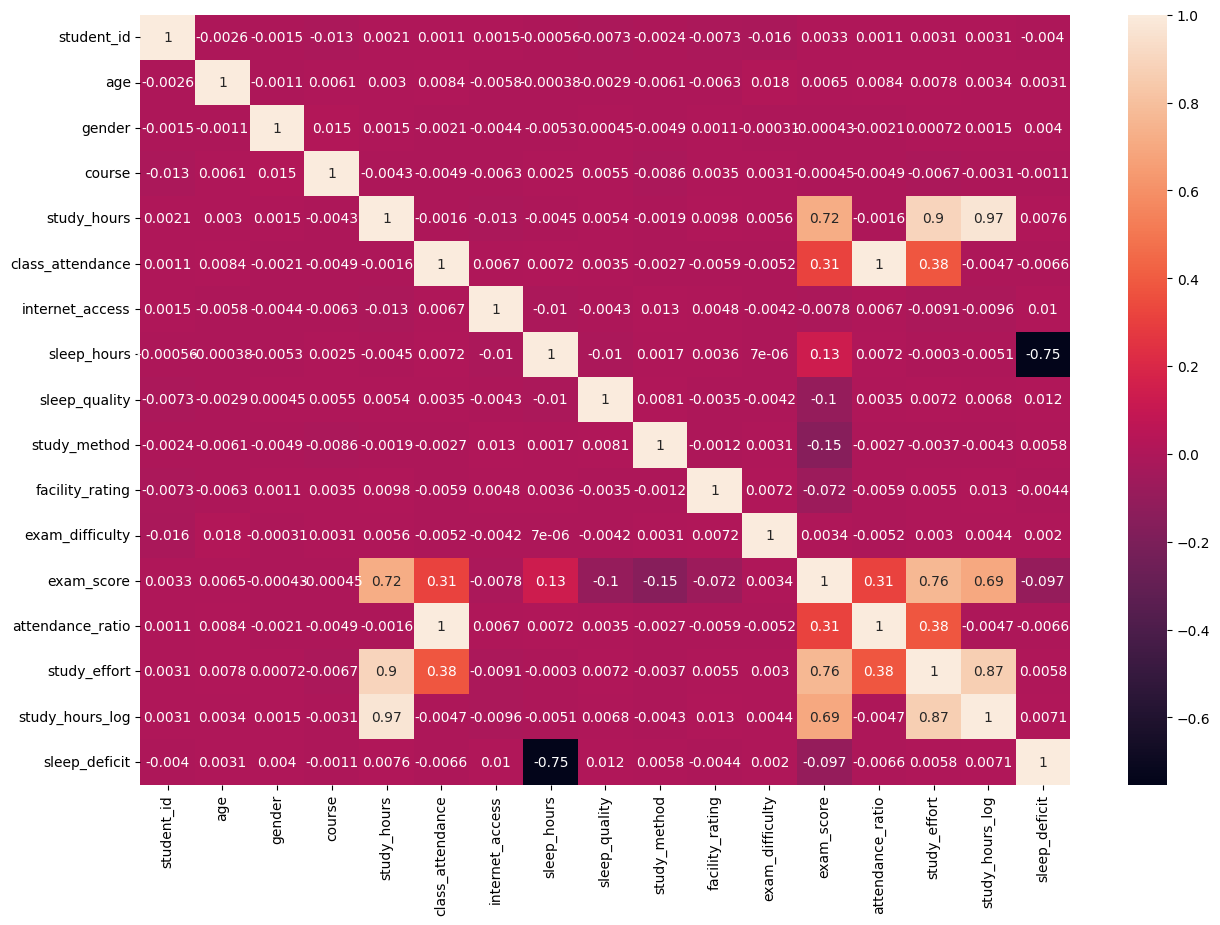

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data=exam_data.corr(),annot=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

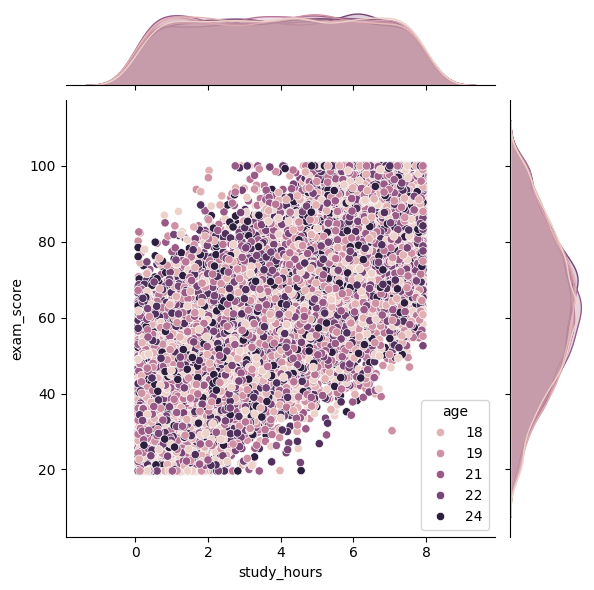

In [94]:
plt.figure(figsize=(15,10))

sns.jointplot(data=exam_data,x="study_hours",y="exam_score",hue="age")
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn. metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



print(exam_data.columns)

X = exam_data.drop(columns =["exam_score","course","study_method","sleep_quality","facility_rating","internet_access","gender","student_id"])
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y = exam_data["exam_score"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score',
       'attendance_ratio', 'study_effort', 'study_hours_log', 'sleep_deficit'],
      dtype='object')


In [96]:

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train R2:", model.score(X_train, y_train))
print("Test R2:", r2_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
mse =mean_squared_error(y_test, y_pred)
print("MSE:",mse )
rmse = mse**0.5
print(f"RMSE  ={rmse}")


Train R2: 0.6306651641021589
Test R2: 0.6214142147370194
R2 Score: 0.6214142147370194
MAE: 9.407305028237499
MSE: 134.64025020817445
RMSE  =11.6034585451138
